<a href="https://colab.research.google.com/github/AmmarNasirDS/DataAnalisisPySpark/blob/main/Data_Analysis_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ammar Nasir |
Created On: 23-Nov-2024

#**Data Analysis Using PySpark**

First mount your drive with google colab to import data easily





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Path = 'drive/My Drive/Dataset'

Install Required Libraries

In [6]:
!pip install pyspark

In [54]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plt


In [8]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

Import Csv File

In [9]:
#Importing Csv Files
listening_csv_path = '/content/drive/MyDrive/DataSet/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

Checking Data

In [10]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [13]:
# Deleting useless columns
listening_df = listening_df.drop('date')

In [14]:
#Drop Null values
listening_df = listening_df.na.drop()

In [15]:
#Checking Dataset Again
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [16]:
#Checking the schema of Dataset
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [18]:
#Checking Shape of Dataset
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


Applying some Queries to Extract Usefull Information

In [70]:
#Selecting 2 columns: track and artist
track_artist = listening_df.select('artist', 'track')
track_artist.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [74]:
#Find all those users who have listened to Rihanna
users_listened_rihanna = listening_df.filter(listening_df.track == 'Rihanna')
users_listened_rihanna.show()

+--------------+-------+--------------------+------------+
|       user_id|  track|              artist|       album|
+--------------+-------+--------------------+------------+
|     alicewxxx|Rihanna|        Clean Bandit|    New Eyes|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|CompleteCallum|Rihanna|   Spark Master Tape|Syrup Splash|
|      curlybap|Rihanna|Clean Bandit X BB...|    New Eyes|
|        Gaz777|Rihanna|Clean Bandit feat...|    New Eyes|
|    inradioing|Rihanna|               Orezi|     Rihanna|
|       jennoiy|Rihanna|            Yo Gotti|     Rihann

In [75]:
#Find top 10 Fans of Rihana
top_10_fans_rihanna = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
top_10_fans_rihanna.show()


+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



In [35]:
#Find Top 10 Famous Tracks
top_10_famous_tracks = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
top_10_famous_tracks.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [77]:
#Find Top 10 Famous Tracks of Rihanna
top_10_famous_tracks_rihanna = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
top_10_famous_tracks_rihanna.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



In [78]:
#Find Top 10 Famous Albums
top_10_famous_albums = listening_df.select('artist', 'album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
top_10_famous_albums.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



Now Working on Genre File

In [40]:
#importing genre.csv file
genre_csv_path = '/content/drive/MyDrive/DataSet/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

In [42]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [43]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [45]:
#Inner Join of 2 Dataframes
data = listening_df.join(genre_df, how = 'inner', on = ['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [79]:
#Find Top 10 Fans of Pop Music
top_10_fans_pop_music = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
top_10_fans_pop_music.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [80]:
#Find Top 10 Famous Genres
top_10_famous_genre = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
top_10_famous_genre.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [81]:
#Find Each User Favourite Genre
#As query is complex so we divide it into 2 Parts
# 1st Part: We will count, how many times each user has listened to specific genre
# 2nd Part: We will find that he or she has listened to it a lot or maximum number of times
part_1 = data.select('user_id', 'genre').groupby('user_id', 'genre').agg(count('*').alias('count')).orderBy('user_id')
part_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   31|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [82]:
 # 2nd Part: We will find that he or she has listened to it a lot or maximum number of times
 # We will use struct function because it allows us to combine 2 or more columns
part_2 = part_1.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
part_2.show()


+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



In [83]:
#Find out how many pop, rock, metal and hip hop singers we have and then visualize it using bar chart
count_diff_music_singers = genre_df.select('genre').filter( (col('genre')=='pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop')).groupby('genre').agg(count('*').alias('count'))
count_diff_music_singers.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



**Visualize by using Matplotlib**

In [65]:
count_diff_music_singers_list = count_diff_music_singers.collect()

In [66]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [67]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


<BarContainer object of 4 artists>

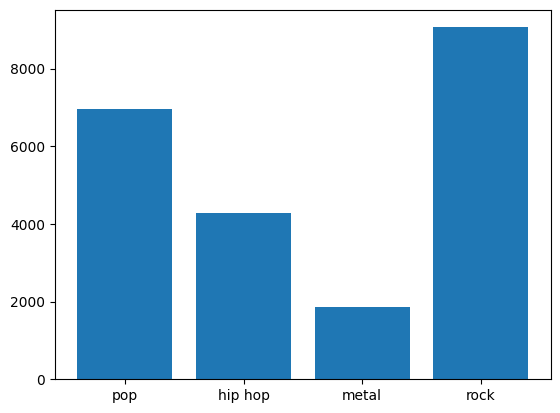

In [69]:
plt.bar(labels, counts)